# case Study on data analysis in Python

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#see all columns
pd.set_option('display.max_columns',15)
#others - max_rows, width, precision, height, date_dayfirst, date_yearfirst
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format
#read data
url='https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/denco.csv'
#df = pd.read_csv('data/denco.csv')
df = pd.read_csv(url)

In [5]:
df

,custname,region,partnum,revenue,cost,margin
0,3M COMPANY,01-East,727032005,24097.50,19851.82,4245.68
1,4-STATE SUPPLY,01-East,735602000,156200.00,52381.38,103818.62
2,4-STATE SUPPLY,01-East,777143000,34927.20,15382.08,19545.12
3,4-STATE SUPPLY,01-East,777142000,21989.40,12562.50,9426.90
4,4-STATE SUPPLY,01-East,735750000,12487.00,3686.91,8800.09
...,...,...,...,...,...,...
7578,VESUVIUS MEXICO SA DE CV,9x-Export,764781000,6874.00,3867.56,3006.44
7579,VESUVIUS MEXICO SA DE CV,9x-Export,733490600,4328.00,2388.36,1939.64
7580,VESUVIUS MEXICO SA DE CV,9x-Export,733496000,4328.00,2388.36,1939.64
7581,VESUVIUS MEXICO SA DE CV,9x-Export,764821000,2402.00,933.36,1468.64


In [ ]:
#%%%% : Summary1
#Who are the most loyal Customers - Improve repeated sales, Target customers with low sales Volumes
#count by customers, sort, pick top 5 
#Series

In [8]:
#see properties of data
print(df.head(n=2))

         custname   region    partnum   revenue     cost    margin
0      3M COMPANY  01-East  727032005  24097.50 19851.82   4245.68
1  4-STATE SUPPLY  01-East  735602000 156200.00 52381.38 103818.62


In [9]:
print(df.columns)

Index(['custname', 'region', 'partnum', 'revenue', 'cost', 'margin'], dtype='object')


In [10]:
df.shape

(7583, 6)

In [11]:
len(df)

7583

In [12]:
df.describe()

,partnum,revenue,cost,margin
count,7583.00,7583.00,7583.00,7583.00
mean,754129644.40,31376.22,14340.26,17035.96
std,19345874.91,390299.28,229213.80,183678.97
min,715000000.00,10.80,0.00,-13099.31
25%,734751200.00,840.00,157.31,546.81
50%,764341000.00,3021.12,824.70,1881.73
75%,768251215.00,13226.90,4668.25,7880.05
max,795900120.00,29800976.28,18922952.69,10878023.59


In [13]:
df.shape

(7583, 6)

In [14]:
df.dtypes

custname     object
region       object
partnum       int64
revenue     float64
cost        float64
margin      float64
dtype: object

In [15]:
df['region'] = df['region'].astype('category')

In [16]:
df.dtypes

custname      object
region      category
partnum        int64
revenue      float64
cost         float64
margin       float64
dtype: object

In [17]:
df.region.value_counts()

region
02-Central          3538
01-East             3335
07-Canada Direct     545
9x-Export            113
05-House              46
09-China               6
Name: count, dtype: int64

<Axes: xlabel='region'>

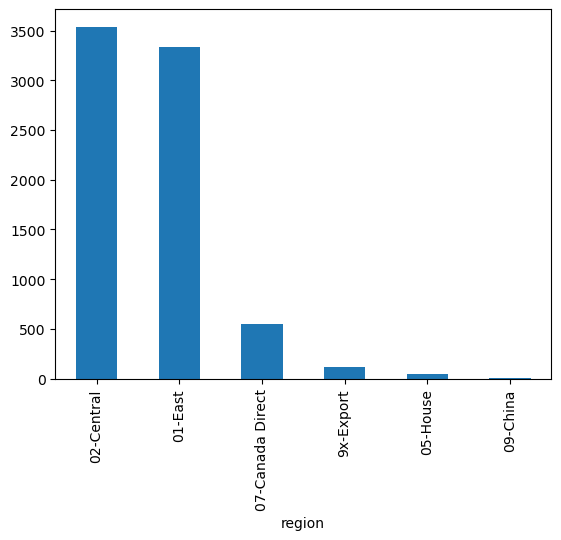

In [18]:
df.region.value_counts().plot(kind='bar')

In [19]:
df.sort_values(['custname'])

,custname,region,partnum,revenue,cost,margin
3335,3-I INDUSTRIAL SUPPLY,02-Central,793450174,5827.50,1552.96,4274.54
3336,3-I INDUSTRIAL SUPPLY,02-Central,734990000,798.40,110.59,687.81
3337,3M COMPANY,02-Central,727032004,2514017.70,1754572.03,759445.67
3338,3M COMPANY,02-Central,793001000,568488.00,226065.71,342422.29
0,3M COMPANY,01-East,727032005,24097.50,19851.82,4245.68
...,...,...,...,...,...,...
3315,ZIRCAR REFRAC. COMPOSITES,01-East,740283502,2666.62,413.99,2252.63
3314,ZIRCAR REFRAC. COMPOSITES,01-East,739741100,2803.84,1784.79,1019.05
3323,ZIRCAR REFRAC. COMPOSITES,01-East,738542000,686.40,574.08,112.32
3333,ZIRCAR ZIRCONIA INC.,01-East,739541000,3687.82,829.48,2858.34


In [20]:
df.custname.value_counts().sort_values(ascending=True)[0:30]

custname
SCHOTT FORMA VITRUM DE       1
AMERET LLC                   1
PARSONS                      1
VSP TECHNOLOGIES             1
ALYSSA OXLEY                 1
ALTAIR TECHNOLOGIES          1
UNIVERSITY OF NOTRE DAME     1
PACOR INC.                   1
BODY COTE                    1
BLOUNT BOATS INC.            1
RALEIGH-DURHAM RUBBER        1
BIRK MANUFACTURING           1
R T P  COMPANY               1
R K METALS LLC               1
BLACKSTONE-NEY ULTRASONIC    1
UNIVERSAL DYNAMICS INC.      1
VIRGINIA TECH                1
AMERICAN DESIGN &            1
PERFORMANCE CONTRACTNG-KY    1
PERFORMANCE FRICTION         1
RAINBOW ART GLASS INC.       1
R.L. WILLIAMS & CO., INC.    1
QUICK CUT GASKET & RUBBER    1
HARCO MANUFACTURING          1
REFRACTORY ANCHORS INC       1
FISHER SCIENTIFIC CO         1
J D SUPPLY                   1
PROPULSION TECHNOLOGY        1
RCG OF NORTH CAROLINA LLC    1
PORTER WALKER INC            1
Name: count, dtype: int64

In [21]:
df.custname.value_counts().sort_values(ascending=False).head(5)

custname
CHIZ BROS INC        253
ARMIL / C F S INC    174
ZAR-TECH             165
PYROTEK INC          164
FIBRECAST INC.       160
Name: count, dtype: int64

In [22]:
#pandas
df.groupby('custname').size().sort_values(ascending=False)

custname
CHIZ BROS INC                253
ARMIL / C F S INC            174
ZAR-TECH                     165
PYROTEK INC                  164
FIBRECAST INC.               160
                            ... 
DILLON SUPPLY                  1
DIELECTRIC SOLUTIONS LLC       1
MULTI-METALS                   1
MUNACO PACKING & RUBBER        1
KIEWIT POWER CONSTRUCTORS      1
Length: 1268, dtype: int64

In [23]:
df.groupby('custname').size().sort_values(ascending=False).head(5)

custname
CHIZ BROS INC        253
ARMIL / C F S INC    174
ZAR-TECH             165
PYROTEK INC          164
FIBRECAST INC.       160
dtype: int64

<Axes: xlabel='custname'>

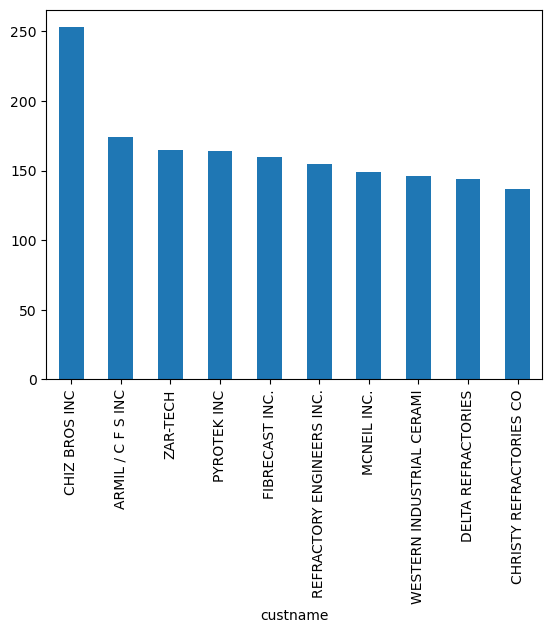

In [24]:
df.groupby('custname').size().sort_values(ascending=False).head(10).plot(kind='bar')

In [25]:
df.custname.value_counts()

custname
CHIZ BROS INC               253
ARMIL / C F S INC           174
ZAR-TECH                    165
PYROTEK INC                 164
FIBRECAST INC.              160
                           ... 
WEST METAL WORKS              1
EAGLE INSULATION              1
WHITE CAP CORPORATION         1
E. A. PATTEN COMPANY          1
COLUMBUS RUBBER & GASKET      1
Name: count, Length: 1268, dtype: int64

<Axes: xlabel='custname'>

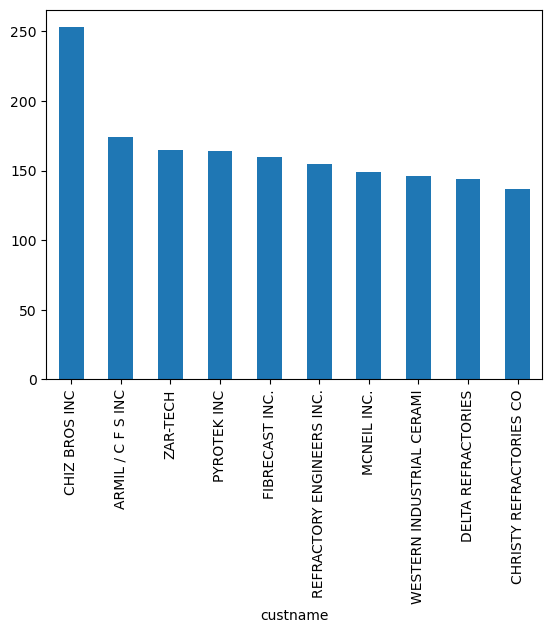

In [26]:
df.groupby('custname').size().sort_values(ascending=False).head(10).plot(kind='bar')
#these are most loyal customers
#Top customer is CHIZ bros inc

In [27]:
#%%% - Summary2
#Which customers contribute the most to their revenue - How do I retain these customers & target incentives
#find total revenue of each customer, sort in descending.

In [28]:
#%%% Summary3
#What part numbers bring in to significant portion of revenue - Maximise revenue from high value parts
#grouby partnum, find value of revenue, sell these more

In [29]:
#find total revenue of each customer, sort in descending.
df.groupby('custname').aggregate({'revenue':np.sum})

/var/folders/z4/8qd93wx14xz1c9qfb_z969wc0000gn/T/ipykernel_12199/3393841085.py:2: FutureWarning: The provided callable <function sum at 0x107255300> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('custname').aggregate({'revenue':np.sum})


,revenue
custname,
3-I INDUSTRIAL SUPPLY,6625.90
3M COMPANY,3106603.20
4-STATE SUPPLY,404716.60
A G C INC.,81982.46
A O SMITH,2368.40
...,...
XPEDX,13134.00
ZAR-TECH,3748205.92
ZIRCAR CERAMICS INC,242397.52


In [35]:
df.groupby('custname').aggregate({'revenue':'sum'}).sort_values(by='revenue', ascending=False)

,revenue
custname,
TRIUMPH INSULATION,35592531.24
CORNING SHARED SERVICES,12843518.78
THERMAL PRODUCTS INC,7209418.18
WESTERN INDUSTRIAL CERAMI,5589784.96
DELTA REFRACTORIES,5546115.08
...,...
CORVID TECHNOLOGIES,143.00
JONATHAN ELLIS,135.00
WHIPMIX,135.00


In [34]:
df.groupby('custname').aggregate({'revenue':'sum'}).sort_values(by='revenue', ascending=False).head(5)

,revenue
custname,
TRIUMPH INSULATION,35592531.24
CORNING SHARED SERVICES,12843518.78
THERMAL PRODUCTS INC,7209418.18
WESTERN INDUSTRIAL CERAMI,5589784.96
DELTA REFRACTORIES,5546115.08


<Axes: xlabel='custname'>

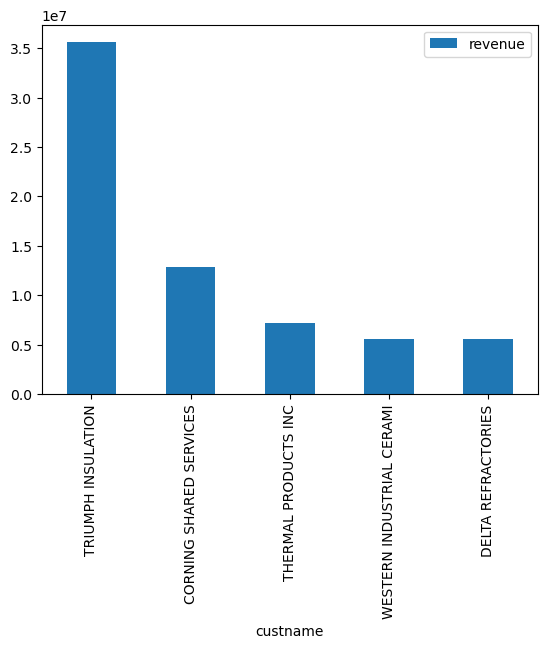

In [36]:
df.groupby('custname').aggregate({'revenue':'sum'}).sort_values(by='revenue', ascending=False).head(5).plot(kind='bar')

In [ ]:
#%%% Summary4
#What parts have the highest profit margin - What parts are driving profits & what parts need to build further
#check for margin value, their individual margin and total sales margin like revenue

In [ ]:
#%%% Extras
#Most sold items